<a href="https://colab.research.google.com/github/shiitake-is-cool/shiitake/blob/main/MLtest4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

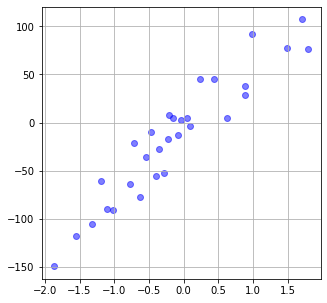

In [7]:
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X,y = make_regression(
random_state=3,
n_features=1,
noise=20,
n_samples=30)

df = pd.DataFrame(X)
plt.figure(figsize=(5,5))
plt.scatter(df[0],y,color="b",alpha=0.5)
plt.grid()
plt.show()